In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg


In [2]:
# # Dataset Link- https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
# import zipfile
# zip_ref = zipfile.ZipFile('/content/chest-xray-pneumonia.zip', 'r')
# zip_ref.extractall('/content')
# zip_ref.close()


In [3]:
# For local system
path = './chest_xray/train'


classes = os.listdir(path)
print(classes)


['NORMAL', 'PNEUMONIA']


In [4]:
# Define the directories for the X-ray images
PNEUMONIA_dir = os.path.join(path + '/' + classes[1])
NORMAL_dir = os.path.join(path + '/' + classes[0])

# Create lists of the file names in each directory
pneumonia_names = os.listdir(PNEUMONIA_dir)
normal_names = os.listdir(NORMAL_dir)

print('There are ', len(pneumonia_names),
	'images of pneumonia infected in training dataset')
print('There are ', len(normal_names), 'normal images in training dataset')


There are  3875 images of pneumonia infected in training dataset
There are  1341 normal images in training dataset


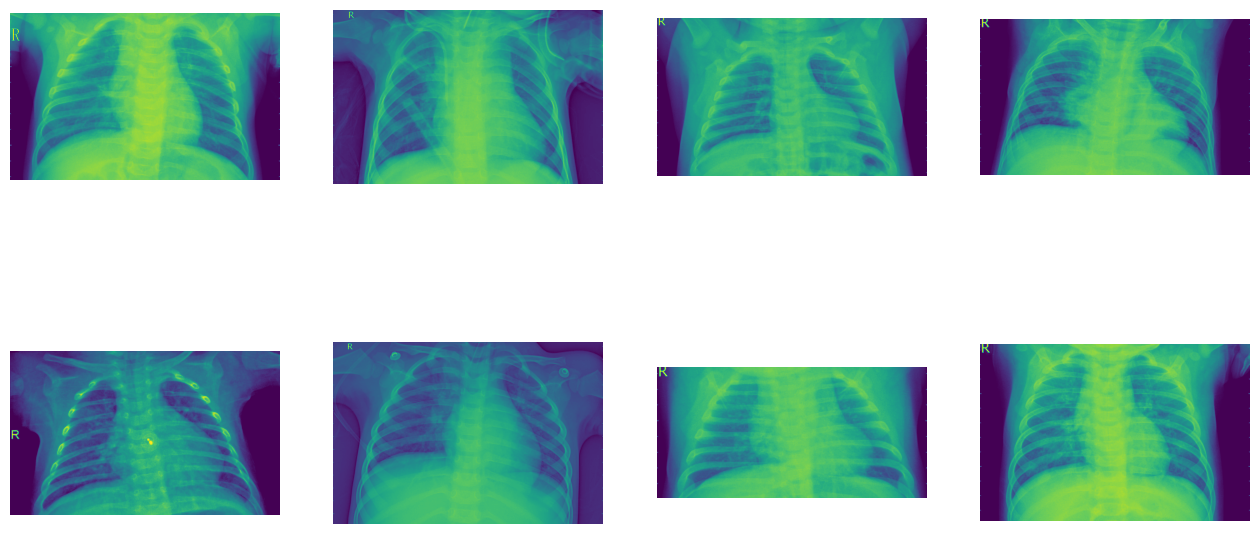

In [5]:
# Set the figure size
fig = plt.gcf()
fig.set_size_inches(16, 8)

# Select the starting index for the images to display
pic_index = 210

# Create lists of the file paths for the 16 images to display
pneumonia_images = [os.path.join(PNEUMONIA_dir, fname)
					for fname in pneumonia_names[pic_index-8:pic_index]]
# Loop through the image paths and display each image in a subplot
for i, img_path in enumerate(pneumonia_images):
	sp = plt.subplot(2, 4, i+1)
	sp.axis('Off')

	# Read in the image using Matplotlib's imread() function
	img = mpimg.imread(img_path)
	plt.imshow(img)

# Display the plot with the 16 images in a 4x4
plt.show()


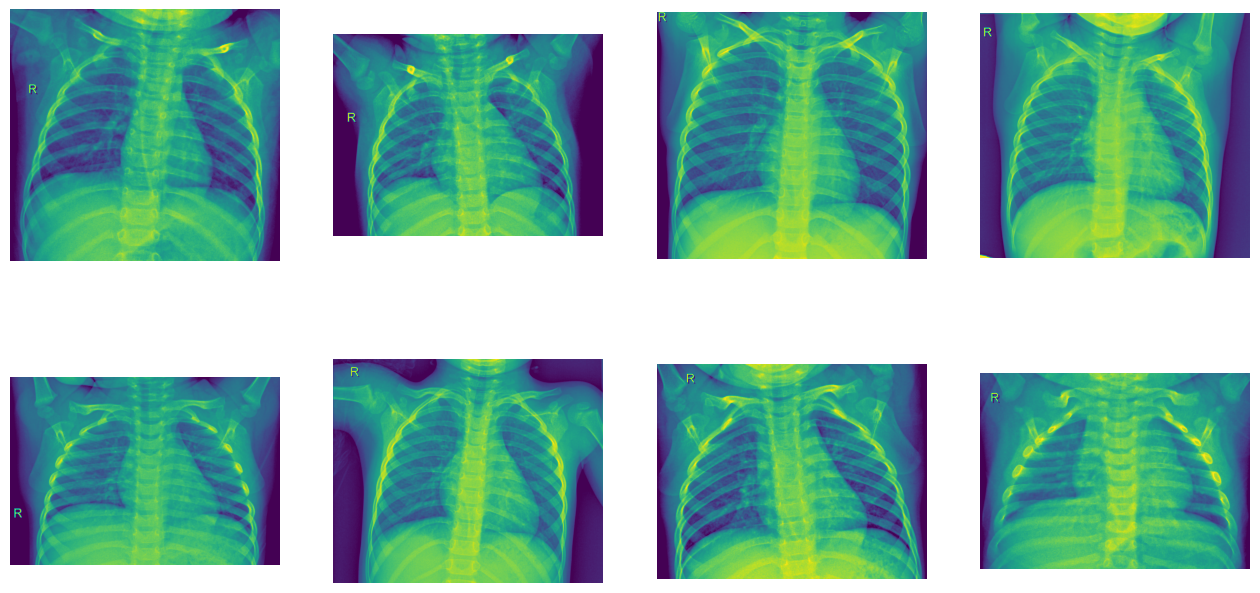

In [6]:
# Set the figure size
fig = plt.gcf()
fig.set_size_inches(16, 8)

# Select the starting index for the images to display
pic_index = 210

# Create lists of the file paths for the 16 images to display
normal_images = [os.path.join(NORMAL_dir, fname)
			for fname in normal_names[pic_index-8:pic_index]]
# Loop through the image paths and display each image in a subplot
for i, img_path in enumerate(normal_images):
	sp = plt.subplot(2, 4, i+1)
	sp.axis('Off')

	# Read in the image using Matplotlib's imread() function
	img = mpimg.imread(img_path)
	plt.imshow(img)

# Display the plot with the 16 images in a 4x4 grid
plt.show()


In [7]:
Train = keras.utils.image_dataset_from_directory(
	directory='./chest_xray/chest_xray/train',
	labels="inferred",
	label_mode="categorical",
	batch_size=32,
	image_size=(256, 256))
Test = keras.utils.image_dataset_from_directory(
	directory='./chest_xray/chest_xray/test',
	labels="inferred",
	label_mode="categorical",
	batch_size=32,
	image_size=(256, 256))
Validation = keras.utils.image_dataset_from_directory(
	directory='./chest_xray/chest_xray/val',
	labels="inferred",
	label_mode="categorical",
	batch_size=32,
	image_size=(256, 256))


Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [8]:
model = tf.keras.models.Sequential([
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),

	layers.Flatten(),
	layers.Dense(512, activation='relu'),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.1),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.2),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.2),
	layers.BatchNormalization(),
	layers.Dense(2, activation='sigmoid')
])


In [9]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,0

 Total params: 7,313,474 (27.90 MB)

 Trainable params: 7,309,378 (27.88 MB)

 Non-trainable params: 4,096 (16.00 KB)

In [10]:
# Plot the keras model
keras.utils.plot_model(
	model,
	# show the shapes of the input/output tensors of each layer
	show_shapes=True,
	# show the data types of the input/output tensors of each layer
	show_dtype=True,
	# show the activations of each layer in the output graph
	show_layer_activations=True
)


You must install pydot (`pip install pydot`) for `plot_model` to work.


In [11]:
model.compile(
	# specify the loss function to use during training
	loss='binary_crossentropy',
	# specify the optimizer algorithm to use during training
	optimizer='adam',
	# specify the evaluation metrics to use during training
	metrics=['accuracy']
)


In [ ]:
history = model.fit(Train,
		epochs=10,
		validation_data=Validation)


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 155s 893ms/step - accuracy: 0.8728 - loss: 0.3287 - val_accuracy: 0.5000 - val_loss: 52.8782
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 141s 861ms/step - accuracy: 0.9447 - loss: 0.1616 - val_accuracy: 0.5000 - val_loss: 3.7928
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 139s 853ms/step - accuracy: 0.9529 - loss: 0.1430 - val_accuracy: 0.5000 - val_loss: 9.8655
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 138s 844ms/step - accuracy: 0.9538 - loss: 0.1352 - val_accuracy: 0.5000 - val_loss: 7.1654
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 139s 853ms/step - accuracy: 0.9580 - loss: 0.1218 - val_accuracy: 0.5000 - val_loss: 4.3419
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 140s 858ms/step - accuracy: 0.9654 - loss: 0.1047 - val_accuracy: 0.5000 - val_loss: 5.5586
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 141s 863ms/step - accuracy: 0.9581 - loss: 0.1071 - val_accuracy: 0.8750 - val_loss: 0.4827
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 139s 853ms/step - accuracy: 0.9644 

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()


In [ ]:
loss, accuracy = model.evaluate(Test)
print('The accuracy of the model on test dataset is',
	np.round(accuracy*100))


In [ ]:
# Load the image from the directory
# "/content/chest_xray/chest_xray/test/NORMAL/IM-0010-0001.jpeg"
# with the target size of (256, 256)
test_image = tf.keras.utils.load_img(
	"./chest_xray/chest_xray/test/NORMAL/IM-0010-0001.jpeg",
	target_size=(256, 256))

# Display the loaded image
plt.imshow(test_image)

# Convert the loaded image into a NumPy array and
# expand its dimensions to match the expected input shape of the model
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Use the trained model to make a prediction on the input image
result = model.predict(test_image)

# Extract the probability of the input image belonging
# to each class from the prediction result
class_probabilities = result[0]

# Determine the class with the highest probability and print its label
if class_probabilities[0] > class_probabilities[1]:
	print("Normal")
else:
	print("Pneumonia")


In [ ]:
# Load the image from the directory
# "/content/chest_xray/chest_xray/test/N
# ORMAL/IM-0010-0001.jpeg" with the target size of (256, 256)
test_image = tf.keras.utils.load_img(
	"./chest_xray/test/NORMAL/IM-0003-0001.jpeg",
	target_size=(256, 256))

# Display the loaded image
plt.imshow(test_image)

# Convert the loaded image into a NumPy array
# and expand its dimensions to match the
# expected input shape of the model
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Use the trained model to make a prediction on the input image
result = model.predict(test_image)

# Extract the probability of the input
# image belonging to each class from
# the prediction result
class_probabilities = result[0]

# Determine the class with the highest
# probability and print its label
if class_probabilities[0] > class_probabilities[1]:
	print("Normal")
else:
	print("Pneumonia")
